In [241]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as er

In [242]:
df = pd.read_csv("incident_event_log.csv")

In [243]:
df.head(3)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00


In [244]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [245]:
not_needed = ['location','assignment_group','assigned_to','caller_id','opened_by','sys_created_by','sys_updated_by','cmdb_ci','problem_id','rfc','vendor','closed_code','resolved_by','caused_by','resolved_by','u_priority_confirmation','notify','sys_mod_count','reassignment_count','urgency']

In [246]:
len(not_needed)

20

In [247]:
df[not_needed]

,location,assignment_group,assigned_to,caller_id,opened_by,sys_created_by,sys_updated_by,cmdb_ci,problem_id,rfc,vendor,closed_code,resolved_by,caused_by,resolved_by,u_priority_confirmation,notify,sys_mod_count,reassignment_count,urgency
0,Location 143,Group 56,?,Caller 2403,Opened by 8,Created by 6,Updated by 21,?,?,?,?,code 5,Resolved by 149,?,Resolved by 149,False,Do Not Notify,0,0,2 - Medium
1,Location 143,Group 56,?,Caller 2403,Opened by 8,Created by 6,Updated by 642,?,?,?,?,code 5,Resolved by 149,?,Resolved by 149,False,Do Not Notify,2,0,2 - Medium
2,Location 143,Group 56,?,Caller 2403,Opened by 8,Created by 6,Updated by 804,?,?,?,?,code 5,Resolved by 149,?,Resolved by 149,False,Do Not Notify,3,0,2 - Medium
3,Location 143,Group 56,?,Caller 2403,Opened by 8,Created by 6,Updated by 908,?,?,?,?,code 5,Resolved by 149,?,Resolved by 149,False,Do Not Notify,4,0,2 - Medium
4,Location 165,Group 70,Resolver 89,Caller 2403,Opened by 397,Created by 171,Updated by 746,?,?,?,?,code 5,Resolved by 81,?,Resolved by 81,False,Do Not Notify,0,0,2 - Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,Location 204,Group 31,Resolver 10,Caller 116,Opened by 12,?,Updated by 27,?,?,?,?,code 9,Resolved by 9,?,Resolved by 9,True,Do Not Notify,4,1,2 - Medium
141708,Location 204,Group 70,Resolver 10,Caller 116,Opened by 12,?,Updated by 908,?,?,?,?,code 6,Resolved by 9,?,Resolved by 9,False,Do Not Notify,0,0,2 - Medium
141709,Location 204,Group 31,?,Caller 116,Opened by 12,?,Updated by 60,?,?,?,?,code 6,Resolved by 9,?,Resolved by 9,False,Do Not Notify,1,1,2 - Medium
141710,Location 204,Group 31,Resolver 10,Caller 116,Opened by 12,?,Updated by 27,?,?,?,?,code 6,Resolved by 9,?,Resolved by 9,True,Do Not Notify,2,1,2 - Medium


In [248]:
a = list(set(list(df.columns)) - set(not_needed))

In [249]:
df=df[a]

In [250]:
df=df[df['resolved_at']!='?']

In [251]:
df.head(2)

,priority,reopen_count,sys_updated_at,contact_type,subcategory,knowledge,made_sla,impact,number,sys_created_at,u_symptom,incident_state,active,resolved_at,category,opened_at,closed_at
0,3 - Moderate,0,29/2/2016 01:23,Phone,Subcategory 170,True,True,2 - Medium,INC0000045,29/2/2016 01:23,Symptom 72,New,True,29/2/2016 11:29,Category 55,29/2/2016 01:16,5/3/2016 12:00
1,3 - Moderate,0,29/2/2016 08:53,Phone,Subcategory 170,True,True,2 - Medium,INC0000045,29/2/2016 01:23,Symptom 72,Resolved,True,29/2/2016 11:29,Category 55,29/2/2016 01:16,5/3/2016 12:00


In [252]:
def find():
    columns = list(df.columns)
    count={}
    for i in columns:
        count[i]=len(df[df[i]=='?'])
    print(count)

In [253]:
find()

C:\Users\Dheeraj\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


{'priority': 0, 'reopen_count': 0, 'sys_updated_at': 0, 'contact_type': 0, 'subcategory': 108, 'knowledge': 0, 'made_sla': 0, 'impact': 0, 'number': 0, 'sys_created_at': 49943, 'u_symptom': 32155, 'incident_state': 0, 'active': 0, 'resolved_at': 0, 'category': 78, 'opened_at': 0, 'closed_at': 0}


In [254]:
df.reset_index(inplace=True)

In [255]:
def a(x):
    if x['sys_created_at']=='?':
        x['sys_created_at']=x['sys_updated_at']
    return x

In [256]:
df=df.apply(a,axis=1)

In [257]:
df.head(2)

,index,priority,reopen_count,sys_updated_at,contact_type,subcategory,knowledge,made_sla,impact,number,sys_created_at,u_symptom,incident_state,active,resolved_at,category,opened_at,closed_at
0,0,3 - Moderate,0,29/2/2016 01:23,Phone,Subcategory 170,True,True,2 - Medium,INC0000045,29/2/2016 01:23,Symptom 72,New,True,29/2/2016 11:29,Category 55,29/2/2016 01:16,5/3/2016 12:00
1,1,3 - Moderate,0,29/2/2016 08:53,Phone,Subcategory 170,True,True,2 - Medium,INC0000045,29/2/2016 01:23,Symptom 72,Resolved,True,29/2/2016 11:29,Category 55,29/2/2016 01:16,5/3/2016 12:00


In [258]:
find()

C:\Users\Dheeraj\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


{'index': 0, 'priority': 0, 'reopen_count': 0, 'sys_updated_at': 0, 'contact_type': 0, 'subcategory': 108, 'knowledge': 0, 'made_sla': 0, 'impact': 0, 'number': 0, 'sys_created_at': 0, 'u_symptom': 32155, 'incident_state': 0, 'active': 0, 'resolved_at': 0, 'category': 78, 'opened_at': 0, 'closed_at': 0}


In [259]:
df['closed_at'] = pd.to_datetime(df['closed_at'])

In [260]:
df['resolved_at'] = pd.to_datetime(df['resolved_at'])

In [261]:
df['opened_at'] = pd.to_datetime(df['opened_at'])

In [262]:
a=(df['closed_at']-df['opened_at'])

In [263]:
import math
v=-math.inf
j=math.inf
values=[]
for i in a:
    v=max(v,i.days)
    j=min(j,i.days)
    values.append(i.days)

In [264]:
v

603

In [265]:
j

-335

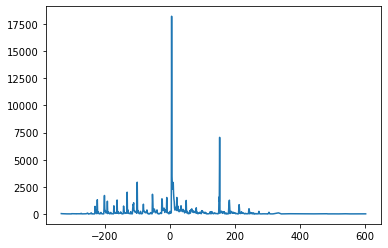

In [266]:
import matplotlib.pyplot as plt
u=np.unique(values,return_counts=True)
plt.plot(u[0],u[1])

In [267]:
values = np.array(values)

In [268]:
np.sum(values<0)

49437

In [269]:
len(values)-np.sum(values<0)

89134

In [270]:
df[df['closed_at']<df['opened_at']]

,index,priority,reopen_count,sys_updated_at,contact_type,subcategory,knowledge,made_sla,impact,number,sys_created_at,u_symptom,incident_state,active,resolved_at,category,opened_at,closed_at
485,489,3 - Moderate,0,29/2/2016 10:52,Phone,Subcategory 9,True,True,2 - Medium,INC0000174,29/2/2016 10:52,Symptom 580,New,True,2016-02-03 13:01:00,Category 32,2016-02-29 10:39:00,2016-02-03 13:02:00
486,490,3 - Moderate,0,1/3/2016 01:57,Phone,Subcategory 9,True,True,2 - Medium,INC0000174,29/2/2016 10:52,Symptom 580,New,True,2016-02-03 13:01:00,Category 32,2016-02-29 10:39:00,2016-02-03 13:02:00
487,491,3 - Moderate,0,2/3/2016 00:33,Phone,Subcategory 9,True,True,2 - Medium,INC0000174,29/2/2016 10:52,Symptom 580,New,True,2016-02-03 13:01:00,Category 32,2016-02-29 10:39:00,2016-02-03 13:02:00
488,492,3 - Moderate,0,2/3/2016 00:58,Phone,Subcategory 9,True,True,2 - Medium,INC0000174,29/2/2016 10:52,Symptom 580,New,True,2016-02-03 13:01:00,Category 32,2016-02-29 10:39:00,2016-02-03 13:02:00
489,493,3 - Moderate,0,2/3/2016 13:01,Phone,Subcategory 9,True,True,2 - Medium,INC0000174,29/2/2016 10:52,Symptom 580,New,True,2016-02-03 13:01:00,Category 32,2016-02-29 10:39:00,2016-02-03 13:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138548,141665,3 - Moderate,0,10/2/2017 14:52,Phone,Subcategory 223,False,True,2 - Medium,INC0118952,10/2/2017 14:52,Symptom 533,Resolved,True,2017-10-02 14:52:00,Category 42,2017-10-02 14:48:00,2017-02-15 15:00:00
138549,141666,3 - Moderate,0,15/2/2017 15:00,Phone,Subcategory 223,False,True,2 - Medium,INC0118952,15/2/2017 15:00,Symptom 533,Closed,False,2017-10-02 14:52:00,Category 42,2017-10-02 14:48:00,2017-02-15 15:00:00
138550,141667,3 - Moderate,0,10/2/2017 15:55,Email,Subcategory 282,False,True,2 - Medium,INC0118999,10/2/2017 15:55,Symptom 302,Active,True,2017-10-02 16:35:00,Category 4,2017-10-02 15:55:00,2017-02-15 17:00:00
138551,141668,3 - Moderate,0,10/2/2017 16:35,Email,Subcategory 282,False,True,2 - Medium,INC0118999,10/2/2017 16:35,Symptom 302,Resolved,True,2017-10-02 16:35:00,Category 4,2017-10-02 15:55:00,2017-02-15 17:00:00


In [271]:
df.reset_index(inplace=True)

In [272]:
a=df[df['closed_at']<df['opened_at']].index

In [273]:
df.drop(a,inplace=True)

In [274]:
df.drop(columns=['index'],inplace=True)

In [275]:
len(df.columns)

18

In [276]:
df.head(3)

,level_0,priority,reopen_count,sys_updated_at,contact_type,subcategory,knowledge,made_sla,impact,number,sys_created_at,u_symptom,incident_state,active,resolved_at,category,opened_at,closed_at
0,0,3 - Moderate,0,29/2/2016 01:23,Phone,Subcategory 170,True,True,2 - Medium,INC0000045,29/2/2016 01:23,Symptom 72,New,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
1,1,3 - Moderate,0,29/2/2016 08:53,Phone,Subcategory 170,True,True,2 - Medium,INC0000045,29/2/2016 01:23,Symptom 72,Resolved,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
2,2,3 - Moderate,0,29/2/2016 11:29,Phone,Subcategory 170,True,True,2 - Medium,INC0000045,29/2/2016 01:23,Symptom 72,Resolved,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00


In [277]:
np.unique(df['priority'])

array(['1 - Critical', '2 - High', '3 - Moderate', '4 - Low'],
      dtype=object)

In [278]:
df['impact']=df['impact'].apply(lambda x:int(x[0]))

In [279]:
df['priority']=df['priority'].apply(lambda x:int(x[0]))

In [280]:
np.unique(df['priority'])

array([1, 2, 3, 4], dtype=int64)

In [281]:
df

,level_0,priority,reopen_count,sys_updated_at,contact_type,subcategory,knowledge,made_sla,impact,number,sys_created_at,u_symptom,incident_state,active,resolved_at,category,opened_at,closed_at
0,0,3,0,29/2/2016 01:23,Phone,Subcategory 170,True,True,2,INC0000045,29/2/2016 01:23,Symptom 72,New,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
1,1,3,0,29/2/2016 08:53,Phone,Subcategory 170,True,True,2,INC0000045,29/2/2016 01:23,Symptom 72,Resolved,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
2,2,3,0,29/2/2016 11:29,Phone,Subcategory 170,True,True,2,INC0000045,29/2/2016 01:23,Symptom 72,Resolved,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
3,3,3,0,5/3/2016 12:00,Phone,Subcategory 170,True,True,2,INC0000045,29/2/2016 01:23,Symptom 72,Closed,False,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
4,4,3,0,29/2/2016 04:57,Phone,Subcategory 215,True,True,2,INC0000047,29/2/2016 04:57,Symptom 471,New,True,2016-01-03 09:52:00,Category 40,2016-02-29 04:40:00,2016-06-03 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138566,138566,3,0,16/2/2017 09:53,Email,Subcategory 223,False,True,2,INC0120835,16/2/2017 09:53,Symptom 494,Closed,False,2017-02-16 09:53:00,Category 42,2017-02-16 09:09:00,2017-02-16 09:53:00
138567,138567,3,0,16/2/2017 14:17,Email,Subcategory 223,False,True,2,INC0121064,16/2/2017 14:17,Symptom 494,Active,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00
138568,138568,3,0,16/2/2017 15:20,Email,Subcategory 223,False,True,2,INC0121064,16/2/2017 15:20,Symptom 494,Active,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00
138569,138569,3,0,16/2/2017 16:38,Email,Subcategory 223,False,True,2,INC0121064,16/2/2017 16:38,Symptom 494,Resolved,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00


In [282]:
df.drop_duplicates(inplace=True)

In [283]:
df

,level_0,priority,reopen_count,sys_updated_at,contact_type,subcategory,knowledge,made_sla,impact,number,sys_created_at,u_symptom,incident_state,active,resolved_at,category,opened_at,closed_at
0,0,3,0,29/2/2016 01:23,Phone,Subcategory 170,True,True,2,INC0000045,29/2/2016 01:23,Symptom 72,New,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
1,1,3,0,29/2/2016 08:53,Phone,Subcategory 170,True,True,2,INC0000045,29/2/2016 01:23,Symptom 72,Resolved,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
2,2,3,0,29/2/2016 11:29,Phone,Subcategory 170,True,True,2,INC0000045,29/2/2016 01:23,Symptom 72,Resolved,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
3,3,3,0,5/3/2016 12:00,Phone,Subcategory 170,True,True,2,INC0000045,29/2/2016 01:23,Symptom 72,Closed,False,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00
4,4,3,0,29/2/2016 04:57,Phone,Subcategory 215,True,True,2,INC0000047,29/2/2016 04:57,Symptom 471,New,True,2016-01-03 09:52:00,Category 40,2016-02-29 04:40:00,2016-06-03 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138566,138566,3,0,16/2/2017 09:53,Email,Subcategory 223,False,True,2,INC0120835,16/2/2017 09:53,Symptom 494,Closed,False,2017-02-16 09:53:00,Category 42,2017-02-16 09:09:00,2017-02-16 09:53:00
138567,138567,3,0,16/2/2017 14:17,Email,Subcategory 223,False,True,2,INC0121064,16/2/2017 14:17,Symptom 494,Active,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00
138568,138568,3,0,16/2/2017 15:20,Email,Subcategory 223,False,True,2,INC0121064,16/2/2017 15:20,Symptom 494,Active,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00
138569,138569,3,0,16/2/2017 16:38,Email,Subcategory 223,False,True,2,INC0121064,16/2/2017 16:38,Symptom 494,Resolved,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00


In [284]:
#filters = ['sys_updated_at','sys_created_at']
filters = ['opened_at']

In [285]:
for i in filters:
    df[i]=pd.to_datetime(df[i])

In [286]:
for i in filters:
    v=list(df[i])
    day=[i.day for i in v]
    month=[i.month for i in v]
    year=[i.year for i in v]
    hour=[i.time().hour for i in v]
    minute=[i.time().minute for i in v]
    df[i+'_day']=day
    df[i+'_month']=month
    df[i+'_year']=year
    df[i+'_hour']=hour
    df[i+'_minute']=minute

In [287]:
df.columns

Index(['level_0', 'priority', 'reopen_count', 'sys_updated_at', 'contact_type',
       'subcategory', 'knowledge', 'made_sla', 'impact', 'number',
       'sys_created_at', 'u_symptom', 'incident_state', 'active',
       'resolved_at', 'category', 'opened_at', 'closed_at', 'opened_at_day',
       'opened_at_month', 'opened_at_year', 'opened_at_hour',
       'opened_at_minute'],
      dtype='object')

In [288]:
df.drop(columns=['sys_updated_at','sys_created_at','level_0'],inplace=True)

In [289]:
df

,priority,reopen_count,contact_type,subcategory,knowledge,made_sla,impact,number,u_symptom,incident_state,active,resolved_at,category,opened_at,closed_at,opened_at_day,opened_at_month,opened_at_year,opened_at_hour,opened_at_minute
0,3,0,Phone,Subcategory 170,True,True,2,INC0000045,Symptom 72,New,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00,29,2,2016,1,16
1,3,0,Phone,Subcategory 170,True,True,2,INC0000045,Symptom 72,Resolved,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00,29,2,2016,1,16
2,3,0,Phone,Subcategory 170,True,True,2,INC0000045,Symptom 72,Resolved,True,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00,29,2,2016,1,16
3,3,0,Phone,Subcategory 170,True,True,2,INC0000045,Symptom 72,Closed,False,2016-02-29 11:29:00,Category 55,2016-02-29 01:16:00,2016-05-03 12:00:00,29,2,2016,1,16
4,3,0,Phone,Subcategory 215,True,True,2,INC0000047,Symptom 471,New,True,2016-01-03 09:52:00,Category 40,2016-02-29 04:40:00,2016-06-03 10:00:00,29,2,2016,4,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138566,3,0,Email,Subcategory 223,False,True,2,INC0120835,Symptom 494,Closed,False,2017-02-16 09:53:00,Category 42,2017-02-16 09:09:00,2017-02-16 09:53:00,16,2,2017,9,9
138567,3,0,Email,Subcategory 223,False,True,2,INC0121064,Symptom 494,Active,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00,16,2,2017,14,17
138568,3,0,Email,Subcategory 223,False,True,2,INC0121064,Symptom 494,Active,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00,16,2,2017,14,17
138569,3,0,Email,Subcategory 223,False,True,2,INC0121064,Symptom 494,Resolved,True,2017-02-16 16:38:00,Category 42,2017-02-16 14:17:00,2017-02-16 16:38:00,16,2,2017,14,17


In [290]:
df.columns

Index(['priority', 'reopen_count', 'contact_type', 'subcategory', 'knowledge',
       'made_sla', 'impact', 'number', 'u_symptom', 'incident_state', 'active',
       'resolved_at', 'category', 'opened_at', 'closed_at', 'opened_at_day',
       'opened_at_month', 'opened_at_year', 'opened_at_hour',
       'opened_at_minute'],
      dtype='object')

In [291]:
label = ['incident_state','category','u_symptom','contact_type','subcategory']

In [292]:
from sklearn.preprocessing import LabelEncoder

In [293]:
for i in label:
    l=LabelEncoder()
    l.fit(df[i])
    df[i]=l.transform(df[i])

In [294]:
df

,priority,reopen_count,contact_type,subcategory,knowledge,made_sla,impact,number,u_symptom,incident_state,active,resolved_at,category,opened_at,closed_at,opened_at_day,opened_at_month,opened_at_year,opened_at_hour,opened_at_minute
0,3,0,2,61,True,True,2,INC0000045,417,7,True,2016-02-29 11:29:00,43,2016-02-29 01:16:00,2016-05-03 12:00:00,29,2,2016,1,16
1,3,0,2,61,True,True,2,INC0000045,417,8,True,2016-02-29 11:29:00,43,2016-02-29 01:16:00,2016-05-03 12:00:00,29,2,2016,1,16
2,3,0,2,61,True,True,2,INC0000045,417,8,True,2016-02-29 11:29:00,43,2016-02-29 01:16:00,2016-05-03 12:00:00,29,2,2016,1,16
3,3,0,2,61,True,True,2,INC0000045,417,6,False,2016-02-29 11:29:00,43,2016-02-29 01:16:00,2016-05-03 12:00:00,29,2,2016,1,16
4,3,0,2,99,True,True,2,INC0000047,290,7,True,2016-01-03 09:52:00,29,2016-02-29 04:40:00,2016-06-03 10:00:00,29,2,2016,4,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138566,3,0,1,106,False,True,2,INC0120835,304,6,False,2017-02-16 09:53:00,31,2017-02-16 09:09:00,2017-02-16 09:53:00,16,2,2017,9,9
138567,3,0,1,106,False,True,2,INC0121064,304,1,True,2017-02-16 16:38:00,31,2017-02-16 14:17:00,2017-02-16 16:38:00,16,2,2017,14,17
138568,3,0,1,106,False,True,2,INC0121064,304,1,True,2017-02-16 16:38:00,31,2017-02-16 14:17:00,2017-02-16 16:38:00,16,2,2017,14,17
138569,3,0,1,106,False,True,2,INC0121064,304,8,True,2017-02-16 16:38:00,31,2017-02-16 14:17:00,2017-02-16 16:38:00,16,2,2017,14,17


In [295]:
a

Int64Index([   485,    486,    487,    488,    489,    490,    491,    919,
               920,    921,
            ...
            138535, 138536, 138537, 138538, 138547, 138548, 138549, 138550,
            138551, 138552],
           dtype='int64', length=49437)

In [296]:
a=list((df['closed_at']-df['opened_at']))
Y=[]
for i in a:
    Y.append(i.days)

In [297]:
Y=np.array(Y)

In [298]:
df.drop(columns=['closed_at','opened_at'],inplace=True)

In [299]:
temp = df.copy()

In [300]:
temp.head(2)

,priority,reopen_count,contact_type,subcategory,knowledge,made_sla,impact,number,u_symptom,incident_state,active,resolved_at,category,opened_at_day,opened_at_month,opened_at_year,opened_at_hour,opened_at_minute
0,3,0,2,61,True,True,2,INC0000045,417,7,True,2016-02-29 11:29:00,43,29,2,2016,1,16
1,3,0,2,61,True,True,2,INC0000045,417,8,True,2016-02-29 11:29:00,43,29,2,2016,1,16


In [301]:
temp.columns

Index(['priority', 'reopen_count', 'contact_type', 'subcategory', 'knowledge',
       'made_sla', 'impact', 'number', 'u_symptom', 'incident_state', 'active',
       'resolved_at', 'category', 'opened_at_day', 'opened_at_month',
       'opened_at_year', 'opened_at_hour', 'opened_at_minute'],
      dtype='object')

In [302]:
temp.drop(columns=['resolved_at'],inplace=True)

In [303]:
one_hot = ["u_symptom","impact","category","subcategory"]

In [304]:
from sklearn.preprocessing import OneHotEncoder as OE

In [305]:
for i in one_hot:
    j = OE()
    a = j.fit_transform(np.array(temp[i]).reshape(-1,1))
    a=pd.DataFrame(a.todense())
    temp.reset_index(inplace=True,drop=True)
    a.reset_index(inplace=True)
    #temp = pd.concat([temp,a],axis=1)

In [306]:
temp.shape

(89134, 17)

In [307]:
#temp.drop(columns='index',inplace=True)

In [308]:
temp.columns

Index(['priority', 'reopen_count', 'contact_type', 'subcategory', 'knowledge',
       'made_sla', 'impact', 'number', 'u_symptom', 'incident_state', 'active',
       'category', 'opened_at_day', 'opened_at_month', 'opened_at_year',
       'opened_at_hour', 'opened_at_minute'],
      dtype='object')

In [309]:
temp['number']=temp['number'].str.replace(r'\D+', '')

In [310]:
temp.head()

,priority,reopen_count,contact_type,subcategory,knowledge,made_sla,impact,number,u_symptom,incident_state,active,category,opened_at_day,opened_at_month,opened_at_year,opened_at_hour,opened_at_minute
0,3,0,2,61,True,True,2,0000045,417,7,True,43,29,2,2016,1,16
1,3,0,2,61,True,True,2,0000045,417,8,True,43,29,2,2016,1,16
2,3,0,2,61,True,True,2,0000045,417,8,True,43,29,2,2016,1,16
3,3,0,2,61,True,True,2,0000045,417,6,False,43,29,2,2016,1,16
4,3,0,2,99,True,True,2,0000047,290,7,True,29,29,2,2016,4,40


In [311]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89134 entries, 0 to 89133
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   priority          89134 non-null  int64 
 1   reopen_count      89134 non-null  int64 
 2   contact_type      89134 non-null  int32 
 3   subcategory       89134 non-null  int32 
 4   knowledge         89134 non-null  bool  
 5   made_sla          89134 non-null  bool  
 6   impact            89134 non-null  int64 
 7   number            89134 non-null  object
 8   u_symptom         89134 non-null  int32 
 9   incident_state    89134 non-null  int32 
 10  active            89134 non-null  bool  
 11  category          89134 non-null  int32 
 12  opened_at_day     89134 non-null  int64 
 13  opened_at_month   89134 non-null  int64 
 14  opened_at_year    89134 non-null  int64 
 15  opened_at_hour    89134 non-null  int64 
 16  opened_at_minute  89134 non-null  int64 
dtypes: bool(3), 

In [312]:
temp.columns

Index(['priority', 'reopen_count', 'contact_type', 'subcategory', 'knowledge',
       'made_sla', 'impact', 'number', 'u_symptom', 'incident_state', 'active',
       'category', 'opened_at_day', 'opened_at_month', 'opened_at_year',
       'opened_at_hour', 'opened_at_minute'],
      dtype='object')

In [313]:
temp['category'].unique()

array([43, 29,  9, 53, 41, 33, 34, 31, 22, 52, 13, 26, 15, 12, 48, 49,  6,
        3, 25,  0, 32, 24,  7, 35, 50, 39, 11, 20, 21,  5, 36, 51, 45, 14,
       44, 27, 17, 30, 42, 18, 19, 16, 23,  8, 10, 38, 46,  2, 37, 47,  1,
       40,  4, 28])

In [314]:
#temp.drop(columns=one_hot,inplace=True)

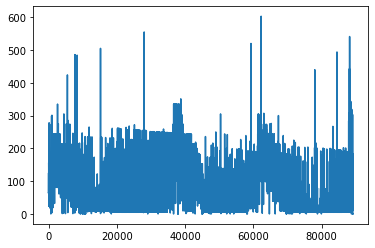

In [315]:
plt.plot(Y)

In [316]:
from sklearn.model_selection import train_test_split as ts

In [317]:
X_train,X_test,Y_train,Y_test = ts(temp,Y)

In [318]:
from sklearn.tree import DecisionTreeRegressor 

In [319]:
tree_reg = DecisionTreeRegressor()

In [320]:
tree_reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [321]:
er(Y_train,tree_reg.predict(X_train))

0.0

In [322]:
er(Y_test,tree_reg.predict(X_test))

887.1788727338001

In [ ]:
tree_reg.predict(X_train)[:10],Y_train[:10]

In [597]:
from sklearn.ensemble import RandomForestRegressor

In [598]:
regressor = RandomForestRegressor(n_estimators=200,max_depth=20)
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, n_estimators=200)

In [599]:
er(Y_train,regressor.predict(X_train))

0.7232498132785559

In [600]:
er(Y_test,regressor.predict(X_test))

3.7802948245903893

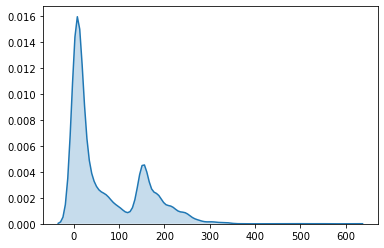

In [266]:
from sklearn.neighbors import KernelDensity
import seaborn as sns
sns.kdeplot(data=Y_test, shade=True)

In [84]:
regressor = RandomForestRegressor(n_estimators=400,max_depth=20)
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, n_estimators=400)

In [85]:
er(Y_train,regressor.predict(X_train))

1045.0312039251003

In [86]:
er(Y_test,regressor.predict(X_test))

1661.3823613993964

In [87]:
regressor = RandomForestRegressor(n_estimators=400,max_depth=25)
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=25, n_estimators=400)

In [88]:
er(Y_train,regressor.predict(X_train))

719.7651031809543

In [89]:
er(Y_test,regressor.predict(X_test))

1498.0741773601708

In [83]:
regressor3 = RandomForestRegressor(n_estimators=410,max_depth=30)
regressor3.fit(X_train,Y_train)

RandomForestRegressor(max_depth=30, n_estimators=410)

In [84]:
er(Y_train,regressor3.predict(X_train))

182.71550686935984

In [85]:
er(Y_test,regressor3.predict(X_test))

1269.029442762633

In [323]:
import pickle
# filename = 'tree_reg.pkl'
# pickle.dump(tree_reg, open(filename, 'wb'))

In [83]:
import joblib
joblib.dump(tree_reg,'tree_model2')

['tree_model2']

In [324]:
with open('model_tr2','wb') as f:
    pickle.dump(tree_reg,f)

In [325]:
with open('model_tr2','rb') as f:
    mp=pickle.load(f)

In [326]:
q1=mp.predict(X_test)

In [329]:
q1

array([  9.,   9., 244., ...,  12.,  10.,  64.])